In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0
import cmocean

In [8]:
%cd ../

/work0/eay


In [14]:
%cd /work/eay/MITgcm_data/Experiment10/
file1 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment12/
file2 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment9/
file3 = nc.MFDataset(['Salt1.nc','Salt2.nc'])
%cd /work/eay/MITgcm_data/
NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)

xqmat=np.tile(xq,(NY,1))
yqmat=np.tile(yq,(NX,1))
yqmat=np.transpose(yqmat)
print(yqmat.shape)
print(xqmat.shape)

/work0/eay/MITgcm_data/Experiment10
/work0/eay/MITgcm_data/Experiment12
/work0/eay/MITgcm_data/Experiment9
/work0/eay/MITgcm_data
(149,)
(1000, 600)
(1000, 600)


In [21]:
mask1 = file1.variables['S'][30,0,:,:]
mask2 = file2.variables['S'][30,0,:,:]
mask3 = file3.variables['S'][30,0,:,:]

mask1.shape

(1000, 600)

In [22]:
#Plotting surface salinity
index1=148
Salt1 = file1.variables['S'][index1,0,:,:]
Salt1[mask1==0]=1e10

index2=149
Salt2 = file2.variables['S'][index2,0,:,:]
Salt2[mask2==0]=1e10

index3=75
Salt3 = file3.variables['S'][index3,0,:,:]
Salt3[mask3==0]=1e10


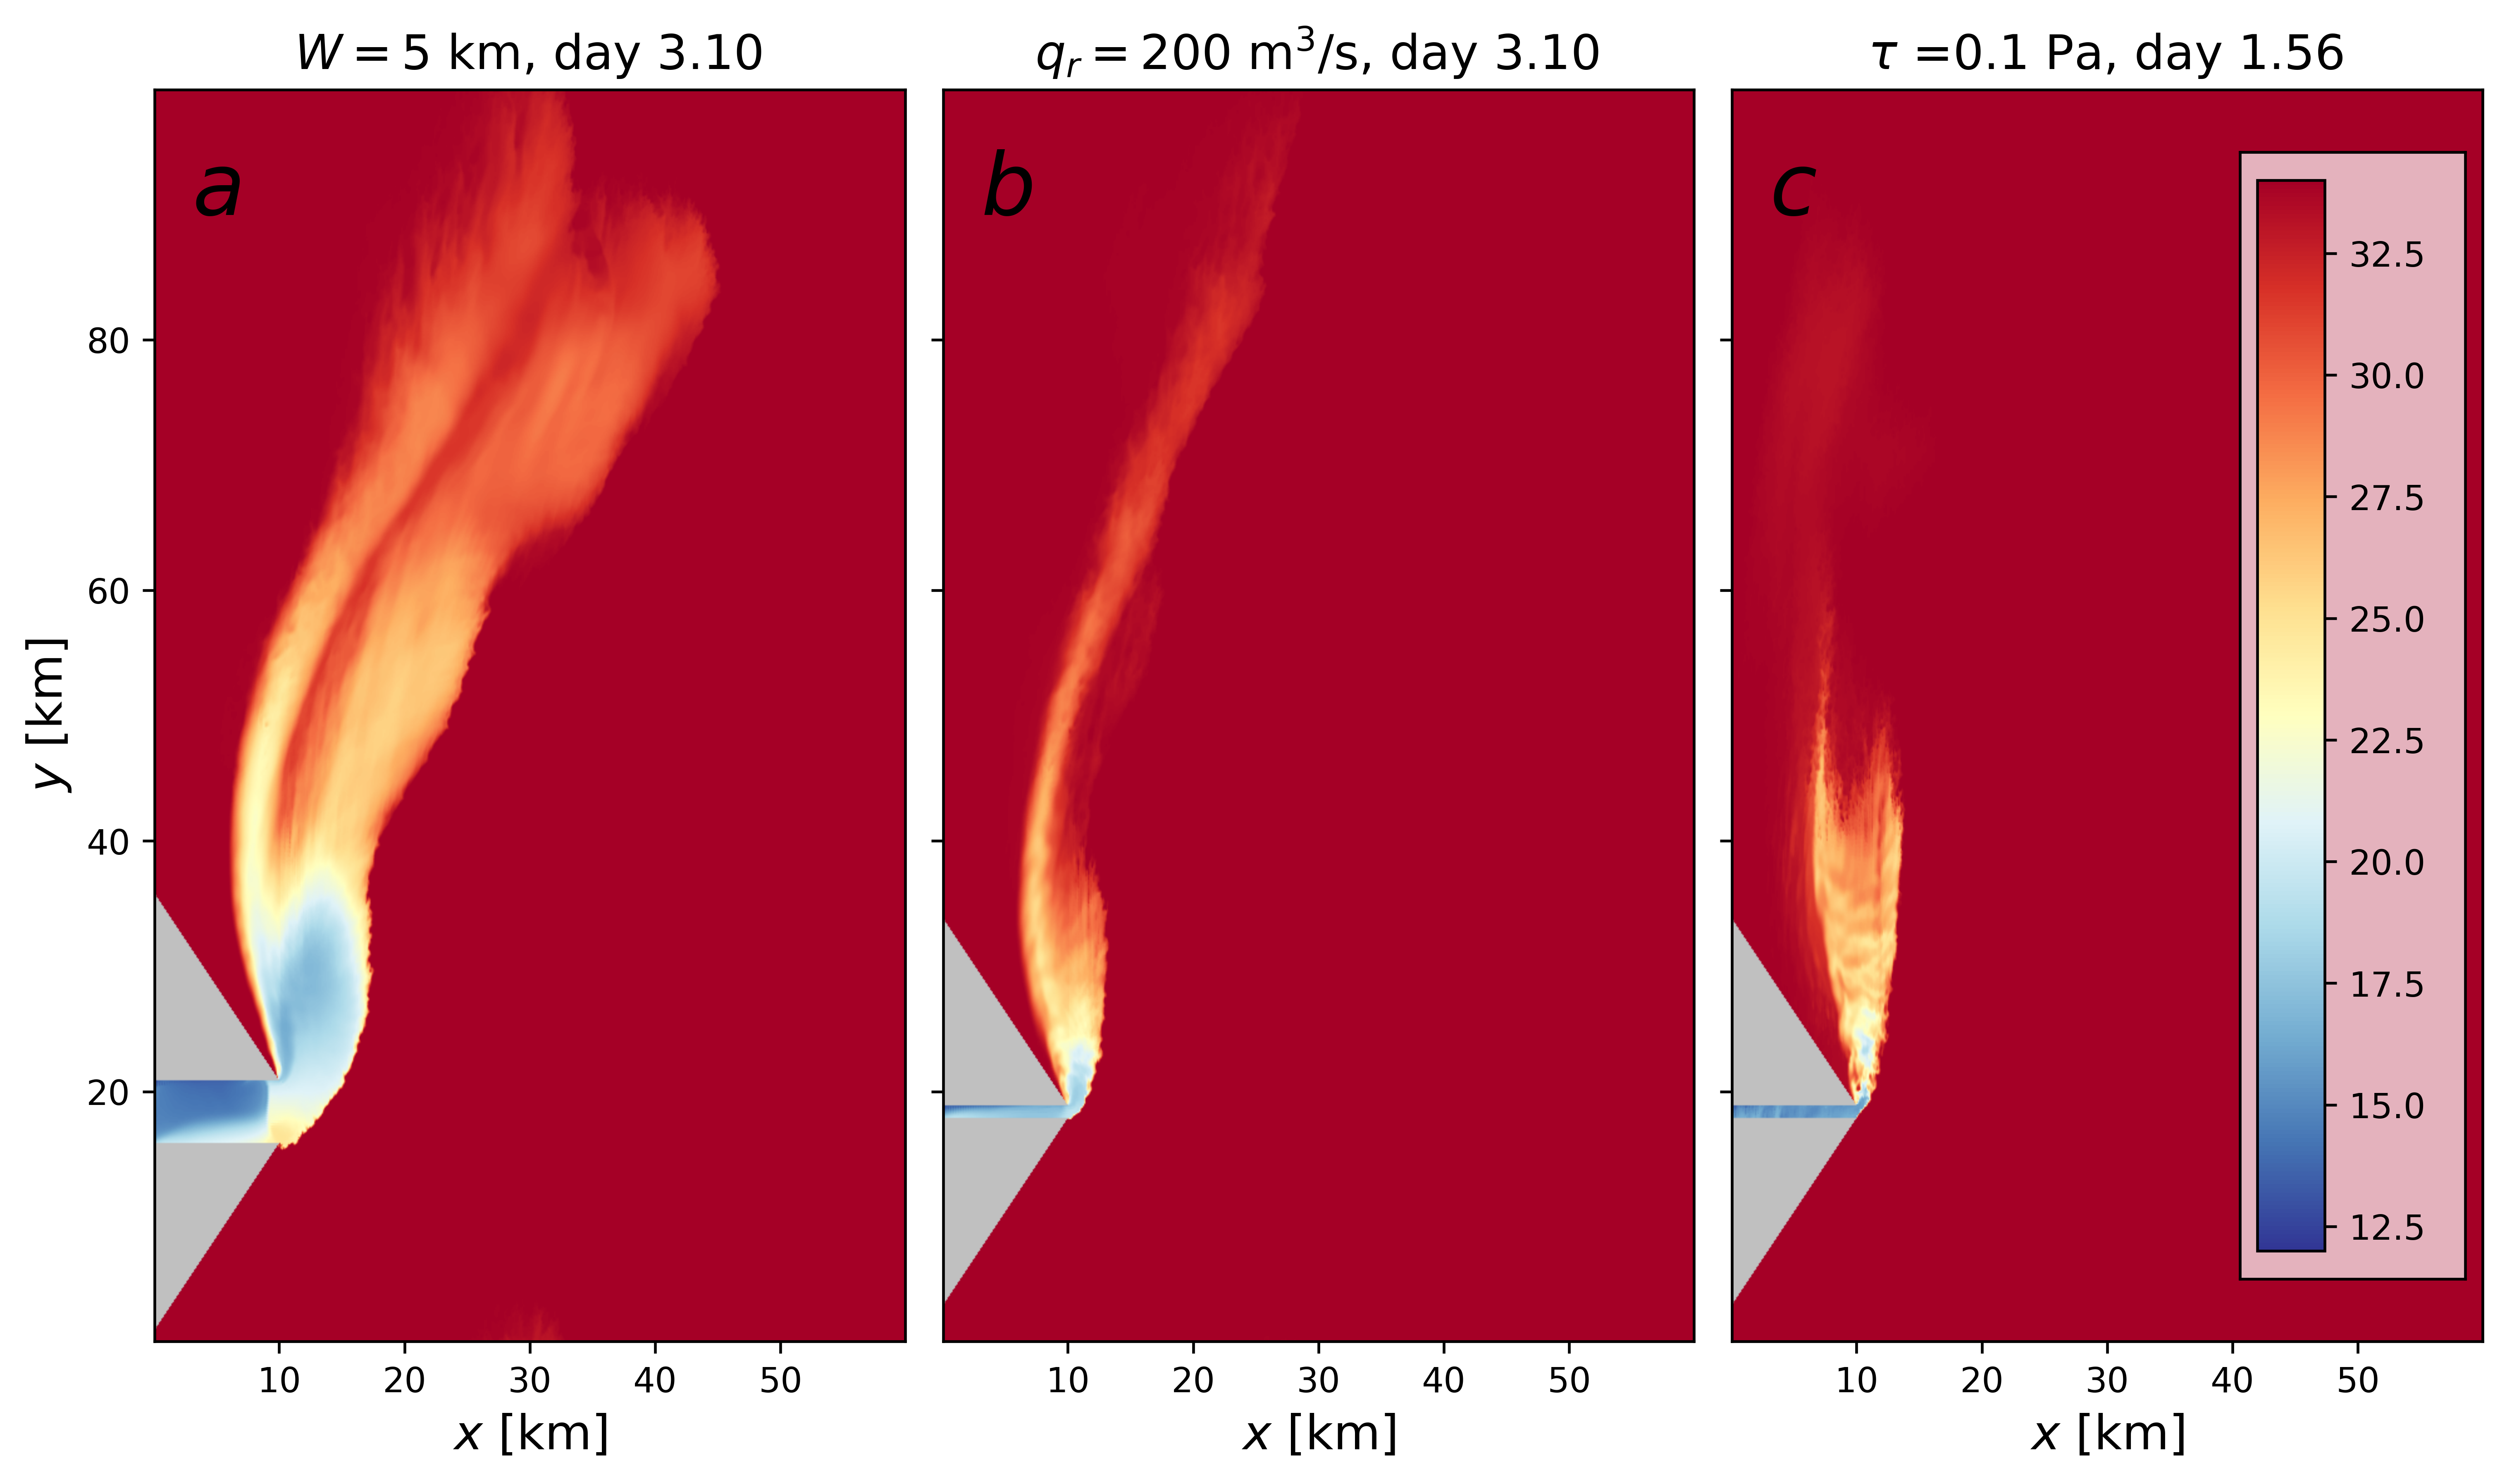

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10.6, 10), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.15,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.45,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.75,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
#ax4 = fig.add_axes([0.95,0.4,0.03,0.4])

#FIRST SUBPLOT
quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt1,cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
quad1.cmap.set_over('silver')
ax1.set_title('$W=5$ km, day %04.2f ' %(149/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)
ax1.set_aspect('equal'); 
divider1 = make_axes_locatable(ax1); cax1 = divider1.new_vertical(size="5%", pad=0.7, pack_start=True)
ax1.text(0.05, 0.9, '$a$', transform=ax1.transAxes,fontsize=25)

quad2 = ax2.pcolormesh(xq/1000,yq/1000,Salt2,cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
quad2.cmap.set_over('silver')
ax2.set_title('$q_r=200$ m$^3$/s, day %04.2f ' %(index2/48.), fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([''])
ax2.set_xlabel('$x$ [km]',fontsize=14)
ax2.set_aspect('equal');
divider2 = make_axes_locatable(ax2); cax2 = divider2.new_vertical(size="5%", pad=0.7, pack_start=True)
ax2.text(0.05, 0.9, '$b$',transform=ax2.transAxes,fontsize=25)

quad3 = ax3.pcolormesh(xq/1000,yq/1000,Salt3,cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
quad3.cmap.set_over('silver')
ax3.set_title('$ \\tau$ =0.1 Pa, day %04.2f ' %(index3/48.), fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
ax3.axes.set_yticklabels([''])
ax3.set_xlabel('$x$ [km]',fontsize=14)
ax3.set_aspect('equal'); 
divider3 = make_axes_locatable(ax3); cax3 = divider3.new_vertical(size="5%", pad=0.7, pack_start=True)
ax3.text(0.05, 0.9, '$c$',transform=ax3.transAxes,fontsize=25)


#Fancy colorbar!
cbbox = inset_axes(ax3, '30%', '90%', loc = 7)
cbbox.axes.set_yticklabels([''])
cbbox.axes.set_xticklabels([''])
cbbox.tick_params(left=False, right=False, bottom = False, top = False)
cbbox.set_facecolor([1,1,1,0.7])
cbaxes = inset_axes(cbbox, '30%', '95%', loc = 6)
fig.colorbar(quad3,cax=cbaxes) #make colorbar




#fig.savefig('Figure1.png', format='png', dpi=600)